<h1>Lezione di ML Perceptron NUMPY</h1>
<p>Corso di Tecniche tecnologie AI</p>
<p>Brezza Salvatore</p>

In [171]:
import psutil
import pandas as pd
import numpy as np
t=psutil.sensors_temperatures()
df=pd.DataFrame(t)

In [172]:
coretemps = df['coretemp']

In [173]:
import psutil
import numpy as np
import random as rd
# Leggi tutte le temperature
temps = psutil.sensors_temperatures()  # <-- assegniamo a 'temps'

# Estrai la temperatura di Core 0
core0_temp = [x.current for x in temps['coretemp'] if x.label == 'Core 0']

# Converti in array NumPy
core0_array = np.array(core0_temp)


In [174]:
#Rrete neurale pelcetrone
import numpy as np

W = np.array([rd.uniform(0, 0.1) for _ in range(1)])
B = np.array([rd.uniform(0, 0.2) for _ in range(1)])
X = np.array([[core0_array.mean()]])
target=np.array([1])
rate=0.7
for epoche in range(10):
    Y = X @ W + B
    error = target - Y
     # Aggiornamento pesi e bias (regola del percettrone)
    W += rate * X.T @ error
    B += rate * error
    print(f"Epoca {epoche+1}, Output: {Y}, Pesi: {W}, Bias: {B}")
    
    
         
    
    

Epoca 1, Output: [1.74191436], Pesi: [-23.8534392], Bias: [-0.44277401]
Epoca 2, Output: [-1097.7009774], Pesi: [35354.31803316], Bias: [768.64791017]
Epoca 3, Output: [1627067.27743559], Pesi: [-52356179.81539286], Bias: [-1138177.74629474]
Epoca 4, Output: [-2.40952245e+09], Pesi: [7.75342667e+10], Bias: [1.68552754e+09]
Epoca 5, Output: [3.5682618e+12], Pesi: [-1.14820496e+14], Bias: [-2.49609773e+12]
Epoca 6, Output: [-5.28423889e+15], Pesi: [1.70037672e+17], Bias: [3.69647113e+15]
Epoca 7, Output: [7.82542938e+18], Pesi: [-2.51808788e+20], Bias: [-5.47410409e+18]
Epoca 8, Output: [-1.15886784e+22], Pesi: [3.72903635e+23], Bias: [8.10660075e+21]
Epoca 9, Output: [1.71616738e+25], Pesi: [-5.52232993e+26], Bias: [-1.20050651e+25]
Epoca 10, Output: [-2.54147227e+28], Pesi: [8.17801839e+29], Bias: [1.77783008e+28]


In [175]:
import time

core0_array = []
for _ in range(50):
    temps = psutil.sensors_temperatures()
    coretemps = temps.get('coretemp', [])
    core0 = [x.current for x in coretemps if x.label == 'Core 0']
    if core0:
        core0_array.append(core0[0])
    time.sleep(0.2)  # piccola pausa per far variare la temperatura


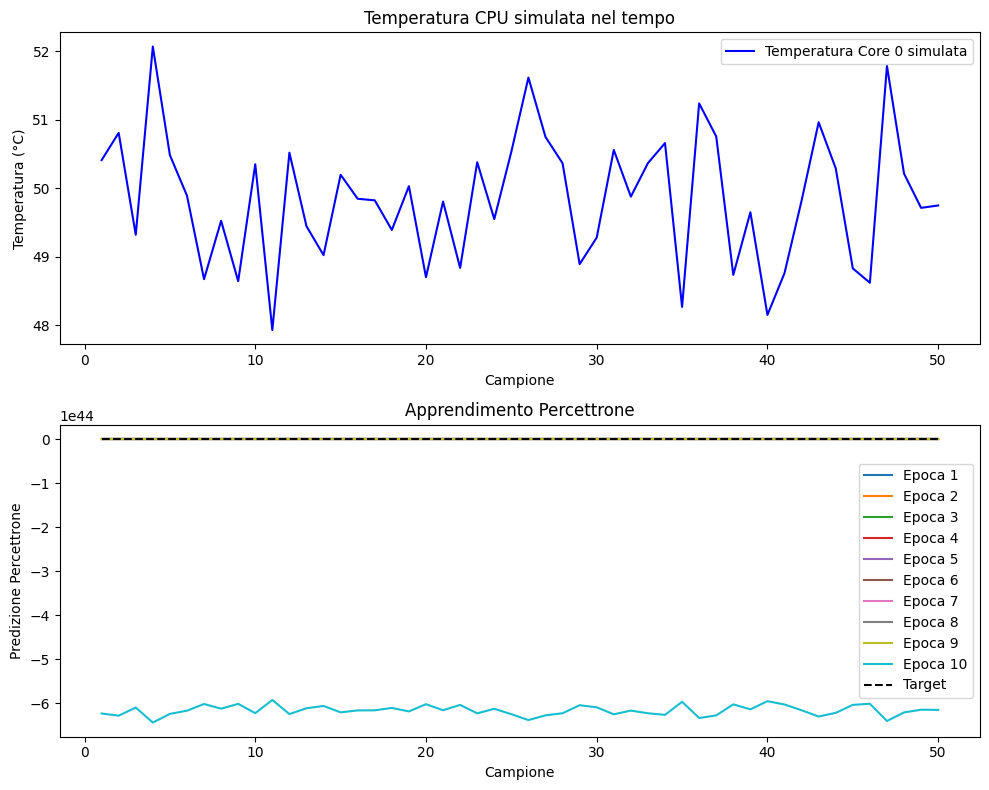

In [176]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

# Simula 50 temperature che variano
core0_array = np.array([50 + np.random.randn() for _ in range(50)])  # media 50°C ± 1
time_array = np.arange(1, len(core0_array)+1)  # asse temporale

# Inizializza percettrone
W = np.array([rd.uniform(0, 0.1)])
B = np.array([rd.uniform(0, 0.2)])
X = core0_array.reshape(-1, 1)
target = np.ones_like(core0_array)
rate = 0.7

# Salva le predizioni per ogni epoca
Y_list = []

for epoca in range(10):
    Y = X @ W + B
    Y_list.append(Y.copy())
    error = target - Y
    W += rate * X.T @ error
    B += rate * error.mean()

# Crea due grafici separati
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Grafico 1: temperatura simulata
axes[0].plot(time_array, core0_array, color='blue', label='Temperatura Core 0 simulata')
axes[0].set_xlabel('Campione')
axes[0].set_ylabel('Temperatura (°C)')
axes[0].legend()
axes[0].set_title('Temperatura CPU simulata nel tempo')

# Grafico 2: apprendimento percettrone
for i, Y_epoch in enumerate(Y_list):
    axes[1].plot(time_array, Y_epoch, label=f'Epoca {i+1}')
axes[1].plot(time_array, target, 'k--', label='Target')
axes[1].set_xlabel('Campione')
axes[1].set_ylabel('Predizione Percettrone')
axes[1].legend()
axes[1].set_title('Apprendimento Percettrone')

plt.tight_layout()
plt.show()

